# Exploring Lung Cell Atlas data
We explore the lung cell atlas data from [_Vieira Braga FA, Kar G, Berg M, et al. A cellular census of human lungs identifies novel cell states in health and in asthma. Nat Med. 2019;25(7):1153-1163. doi:10.1038/s41591-019-0468-5_](https://www.nature.com/articles/s41591-019-0468-5).

You can download the (preprocessed) data [here](https://figshare.com/ndownloader/files/24539942).

The dataset includes data from 16 different donors.

In [10]:
import warnings
warnings.filterwarnings("ignore")

import scib
import scanpy as sc

In [11]:
adata = sc.read('../../data/Lung_atlas_public.h5ad')
adata

AnnData object with n_obs × n_vars = 32472 × 15148
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor'
    layers: 'counts'

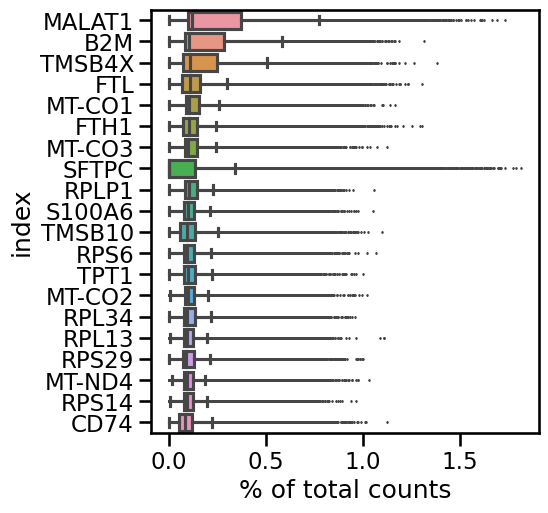

In [3]:
sc.pl.highest_expr_genes(adata, n_top=20, )

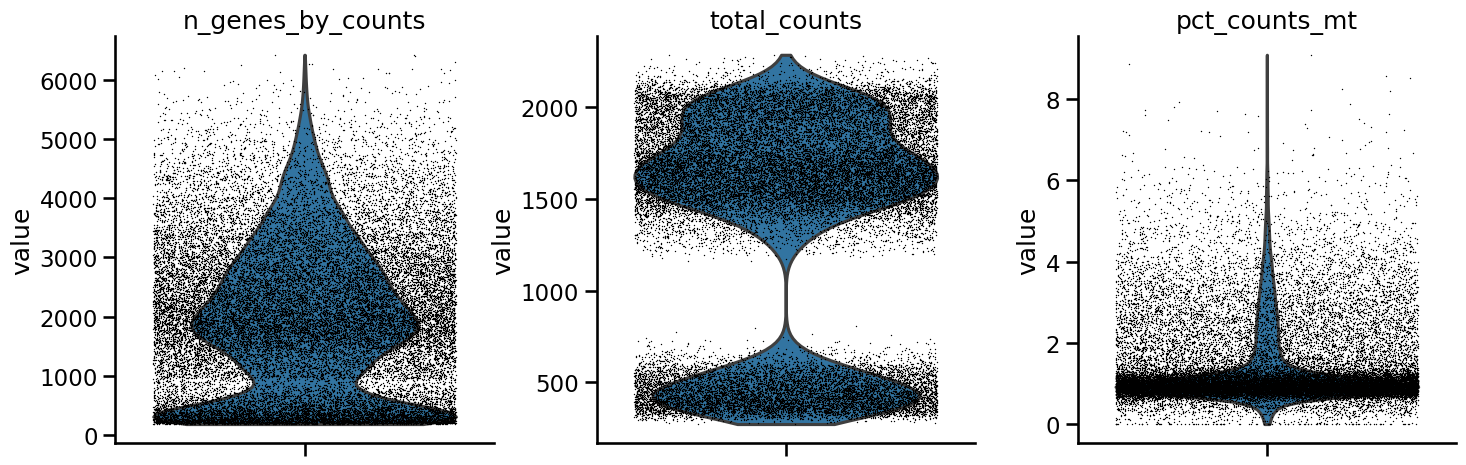

In [4]:
adata.var["mt"] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

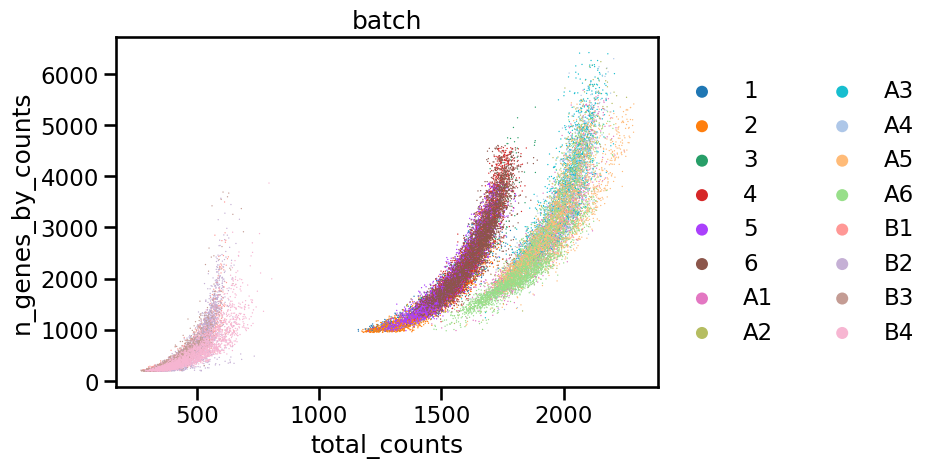

In [5]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='batch')

In [6]:
sc.pp.highly_variable_genes(adata, n_top_genes=4000, flavor='cell_ranger')
sc.pp.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)

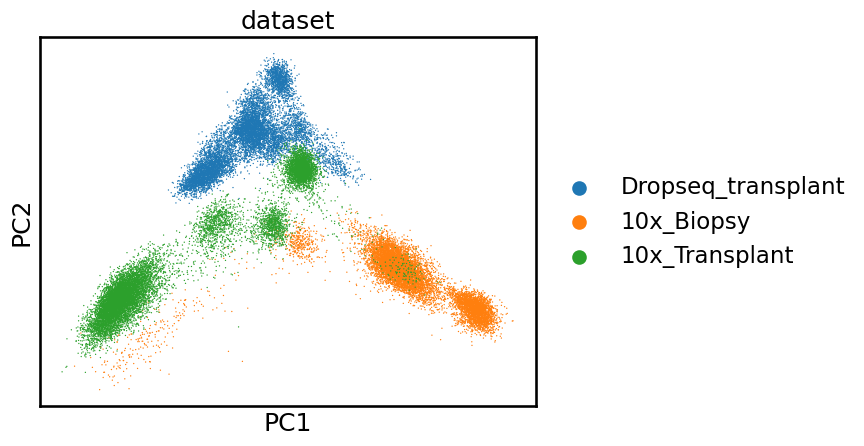

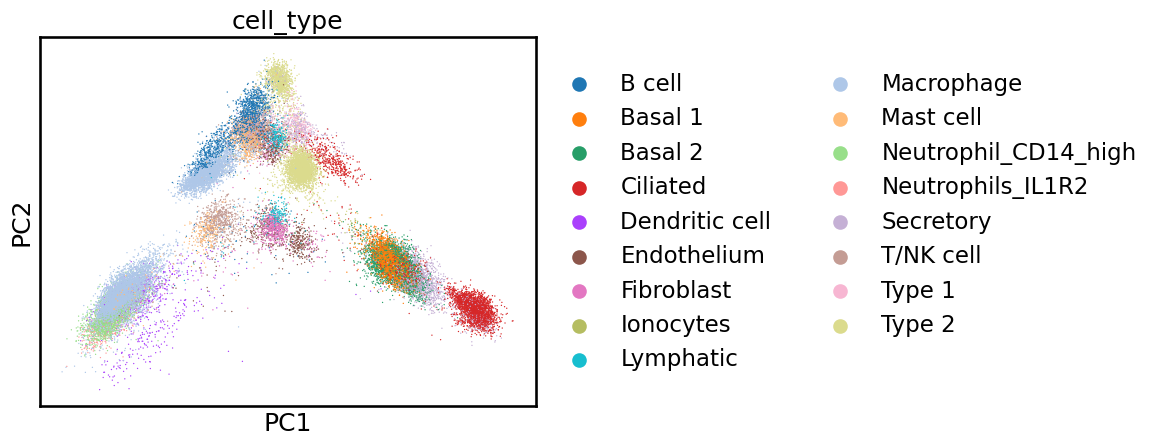

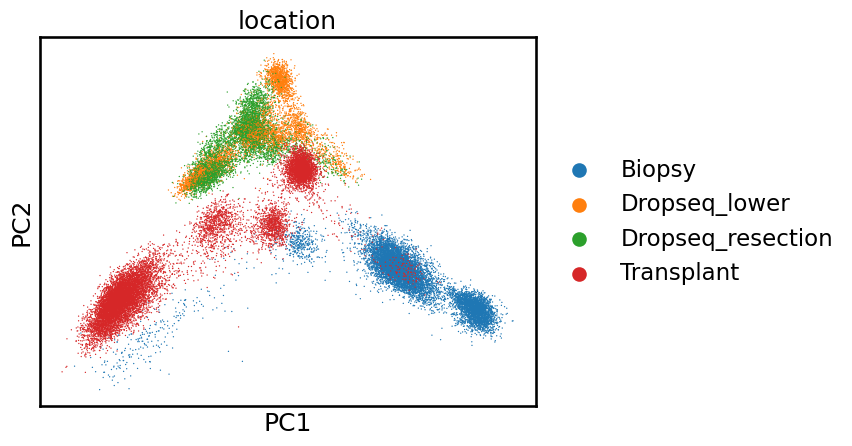

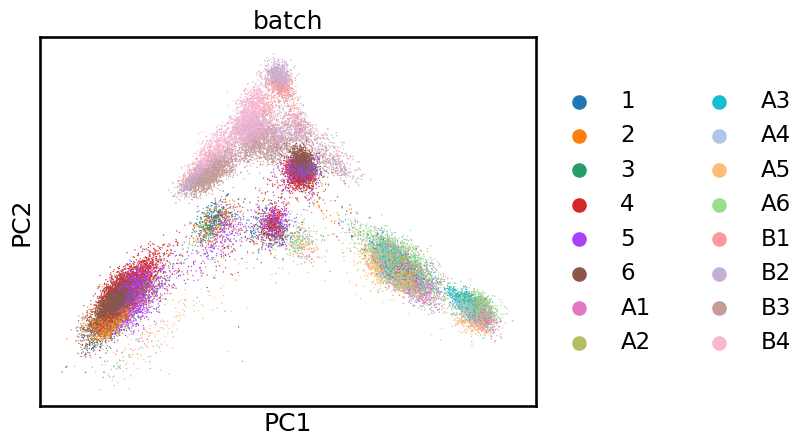

In [8]:
sc.pl.pca(adata, color=['dataset'])
sc.pl.pca(adata, color=['cell_type'])
sc.pl.pca(adata, color=['location'])
sc.pl.pca(adata, color=['batch'])

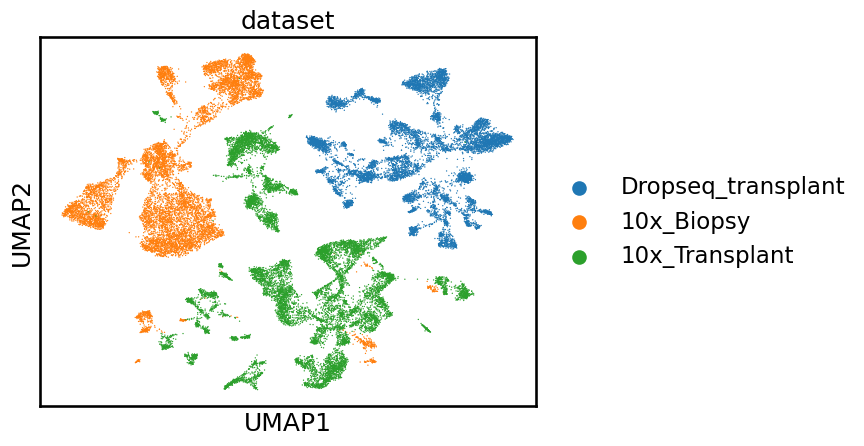

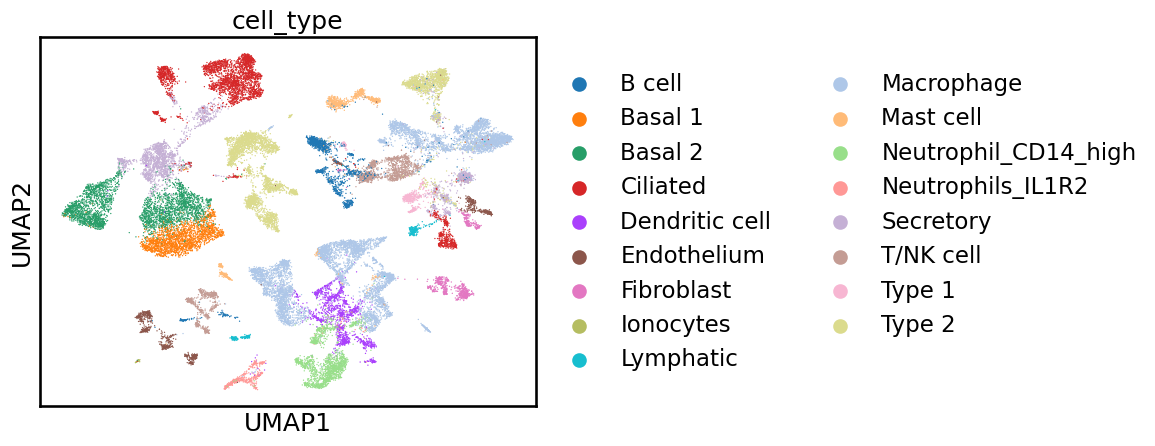

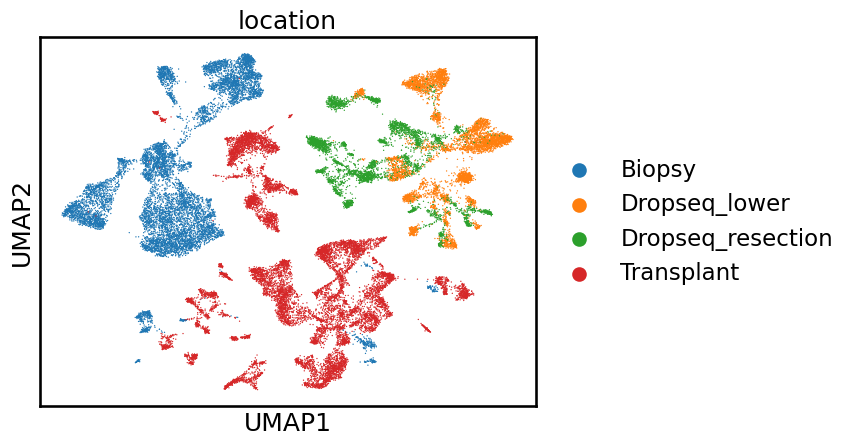

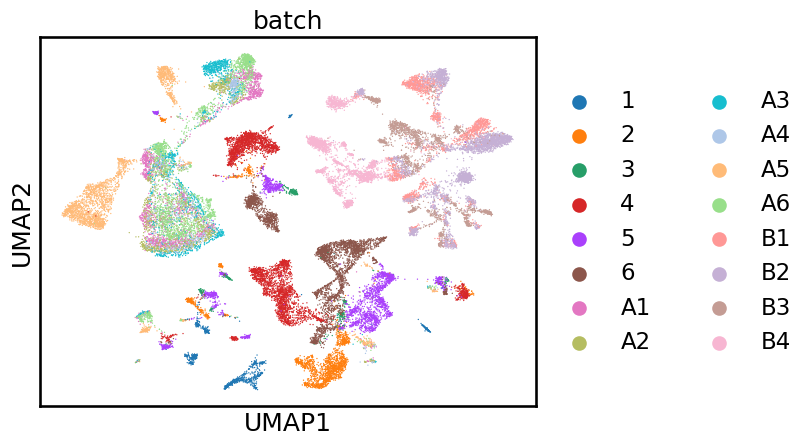

In [7]:
sc.pl.umap(adata, color=['dataset'])
sc.pl.umap(adata, color=['cell_type'])
sc.pl.umap(adata, color=['location'])
sc.pl.umap(adata, color=['batch'])